<a href="https://colab.research.google.com/github/lavahawk/machinelearning_collab/blob/main/saving_loading_dqn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Stable Baselines3 - Training, Saving and Loading

Github Repo: [https://github.com/DLR-RM/stable-baselines3](https://github.com/DLR-RM/stable-baselines3)


[RL Baselines3 Zoo](https://github.com/DLR-RM/rl-baselines3-zoo) is a training framework for Reinforcement Learning (RL), using Stable Baselines3.

It provides scripts for training, evaluating agents, tuning hyperparameters, plotting results and recording videos.

Documentation is available online: [https://stable-baselines3.readthedocs.io/](https://stable-baselines3.readthedocs.io/)

## Install Dependencies and Stable Baselines Using Pip


```
pip install stable-baselines3[extra]
```

In [1]:
# for autoformatting
# %load_ext jupyter_black

In [2]:
!apt-get update && apt-get install swig cmake
!pip install box2d-py
!pip install "stable-baselines3[extra]>=2.0.0a4"
!pip install matplotlib

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Hit:2 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:3 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:5 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:6 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:7 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:11 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [1,383 kB]
Get:12 https://r2u.stat.illinois.edu/ubuntu jammy/main all Packages [8,810 kB]
Get:13 http://archive.ubuntu.com/ubuntu jammy-upda

## Import policy, RL agent, ...

In [3]:
import gymnasium as gym
import numpy as np

from stable_baselines3 import DQN

## Create the Gym env and instantiate the agent

For this example, we will use Lunar Lander environment.

"Landing outside landing pad is possible. Fuel is infinite, so an agent can learn to fly and then land on its first attempt. Four discrete actions available: do nothing, fire left orientation engine, fire main engine, fire right orientation engine. "

Lunar Lander environment: [https://gymnasium.farama.org/environments/box2d/lunar_lander/](https://gymnasium.farama.org/environments/box2d/lunar_lander/)

![Lunar Lander](https://cdn-images-1.medium.com/max/960/1*f4VZPKOI0PYNWiwt0la0Rg.gif)


We chose the MlpPolicy because input of Lunar Lander is a feature vector, not images.

The type of action to use (discrete/continuous) will be automatically deduced from the environment action space



In [4]:
model = DQN(
    "MlpPolicy",
    "LunarLander-v3",
    verbose=1,
    exploration_final_eps=0.1,
    target_update_interval=250,
)

Using cuda device
Creating environment from the given name 'LunarLander-v3'


/usr/local/lib/python3.11/dist-packages/pygame/pkgdata.py:25: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  from pkg_resources import resource_stream, resource_exists
/usr/local/lib/python3.11/dist-packages/pkg_resources/__init__.py:3154: DeprecationWarning: Deprecated call to `pkg_resources.declare_namespace('google')`.
Implementing implicit namespace packages (as specified in PEP 420) is preferred to `pkg_resources.declare_namespace`. See https://setuptools.pypa.io/en/latest/references/keywords.html#keyword-namespace-packages
  declare_namespace(pkg)
/usr/local/lib/python3.11/dist-packages/pkg_resources/__init__.py:3154: DeprecationWarning: Deprecated call to `pkg_resources.declare_namespace('google.cloud')`.
Implementing implicit namespace packages (as specified in PEP 420) is preferred to `pkg_resources.declare_namespace`. See https://setuptools.pypa.io/en/latest/references/keywords.html#keyword-namespace-pa

Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


We load a helper function to evaluate the agent:

In [5]:
from stable_baselines3.common.evaluation import evaluate_policy

Let's evaluate the un-trained agent, this should be a random agent.

In [6]:
# Separate env for evaluation
eval_env = gym.make("LunarLander-v3")

# Random Agent, before training
mean_reward, std_reward = evaluate_policy(
    model,
    eval_env,
    n_eval_episodes=10,
    deterministic=True,
)

print(f"mean_reward={mean_reward:.2f} +/- {std_reward}")

/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


mean_reward=-269.79 +/- 158.7735161273245


## Train the agent and save it

Warning: this may take a while

In [7]:
# Train the agent
model.learn(total_timesteps=int(1e5))
# Save the agent
model.save("dqn_lunar")
del model  # delete trained model to demonstrate loading

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 92.2     |
|    ep_rew_mean      | -174     |
|    exploration_rate | 0.967    |
| time/               |          |
|    episodes         | 4        |
|    fps              | 414      |
|    time_elapsed     | 0        |
|    total_timesteps  | 369      |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.866    |
|    n_updates        | 67       |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 92.6     |
|    ep_rew_mean      | -146     |
|    exploration_rate | 0.933    |
| time/               |          |
|    episodes         | 8        |
|    fps              | 599      |
|    time_elapsed     | 1        |
|    total_timesteps  | 741      |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 7.09     |
|    n_updates      

In [13]:
import gymnasium as gym
import numpy as np
from stable_baselines3 import DQN
from stable_baselines3.common.evaluation import evaluate_policy

# Create the Gym env and instantiate the agent
env = gym.make("LunarLander-v3")
model = DQN(
    "MlpPolicy",
    env,  # Pass the environment directly
    verbose=1,
    exploration_final_eps=0.1,
    target_update_interval=250,
)

# Training loop with goal tracking
goal_reached_count = 0
episode_count = 0
first_goal_episode = -1  # Initialize to -1 to indicate not reached yet

while goal_reached_count < 10:  # Train until 10 consecutive goals
    episode_count += 1
    obs, info = env.reset()
    done = False
    episode_reward = 0

    while not done:
        action, _states = model.predict(obs, deterministic=True)
        obs, reward, terminated, truncated, info = env.step(action)
        episode_reward += reward
        done = terminated or truncated

    if episode_reward >= 200:  # Define goal as reward >= 200
        goal_reached_count += 1
        if first_goal_episode == -1:
            first_goal_episode = episode_count  # Record first goal episode
    else:
        goal_reached_count = 0  # Reset count if goal not reached

    model.learn(total_timesteps=1000)  # Train for 1000 steps after each episode


print(f"First goal reached in episode: {first_goal_episode}")
print("Training complete: Goal reached 10 times in a row.")

# Save the trained model
model.save("dqn_lunar_trained")

# Evaluate the trained agent
eval_env = gym.make("LunarLander-v3")
mean_reward, std_reward = evaluate_policy(model, eval_env, n_eval_episodes=10, deterministic=True)
print(f"mean_reward={mean_reward:.2f} +/- {std_reward}")

Using cuda device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 79.2     |
|    ep_rew_mean      | -383     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 4        |
|    fps              | 746      |
|    time_elapsed     | 0        |
|    total_timesteps  | 317      |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 6.88     |
|    n_updates        | 54       |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 74.9     |
|    ep_rew_mean      | -359     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 8        |
|    fps              | 622      |
|    time_elapsed     | 0        |
|    total_timesteps  | 599      |
| train/              |       

/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


mean_reward=169.12 +/- 81.75378848410983


## Load the trained agent

In [8]:
model = DQN.load("dqn_lunar")

In [9]:
# Evaluate the trained agent
mean_reward, std_reward = evaluate_policy(model, eval_env, n_eval_episodes=10, deterministic=True)

print(f"mean_reward={mean_reward:.2f} +/- {std_reward}")

mean_reward=-71.53 +/- 33.324683029704886


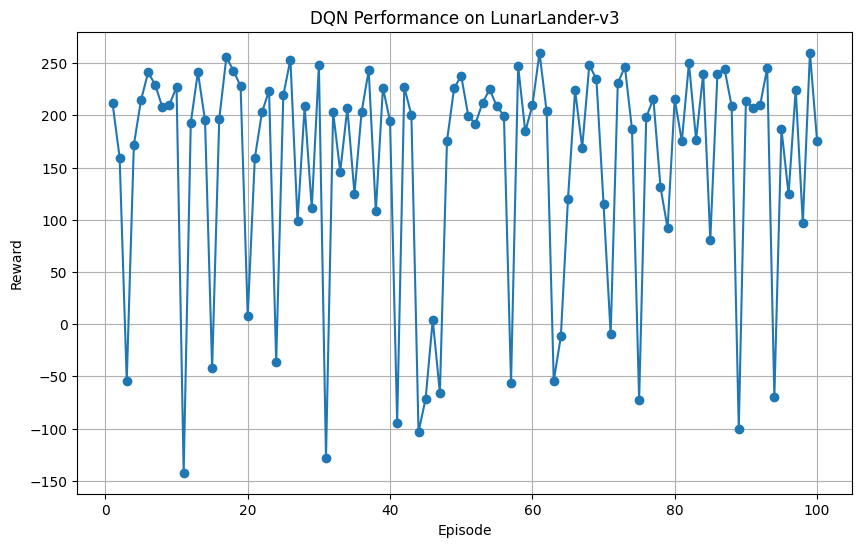

In [15]:
# prompt: Graph the resulting model

import matplotlib.pyplot as plt

# Assuming 'model' is your trained DQN model and 'eval_env' is your evaluation environment
#  and you have already run the training and evaluation cells above

# Evaluate the trained agent multiple times to get a sense of the variance
n_eval_episodes = 100
rewards = []
for _ in range(n_eval_episodes):
    obs, info = eval_env.reset()
    done = False
    episode_reward = 0
    while not done:
        action, _states = model.predict(obs, deterministic=True)
        obs, reward, terminated, truncated, info = eval_env.step(action)
        episode_reward += reward
        done = terminated or truncated  # Check for both termination and truncation
    rewards.append(episode_reward)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(range(1, n_eval_episodes + 1), rewards, marker='o', linestyle='-')
plt.xlabel('Episode')
plt.ylabel('Reward')
plt.title('DQN Performance on LunarLander-v3')
plt.grid(True)
plt.show()


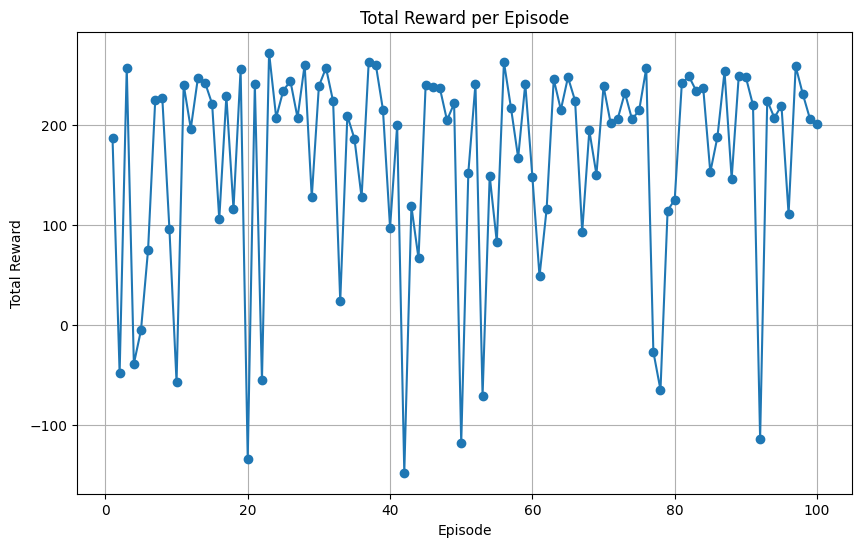

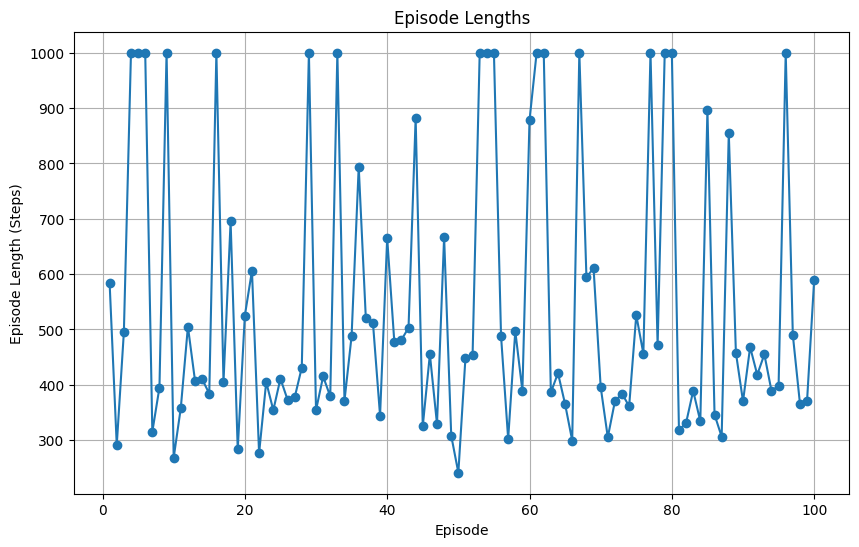

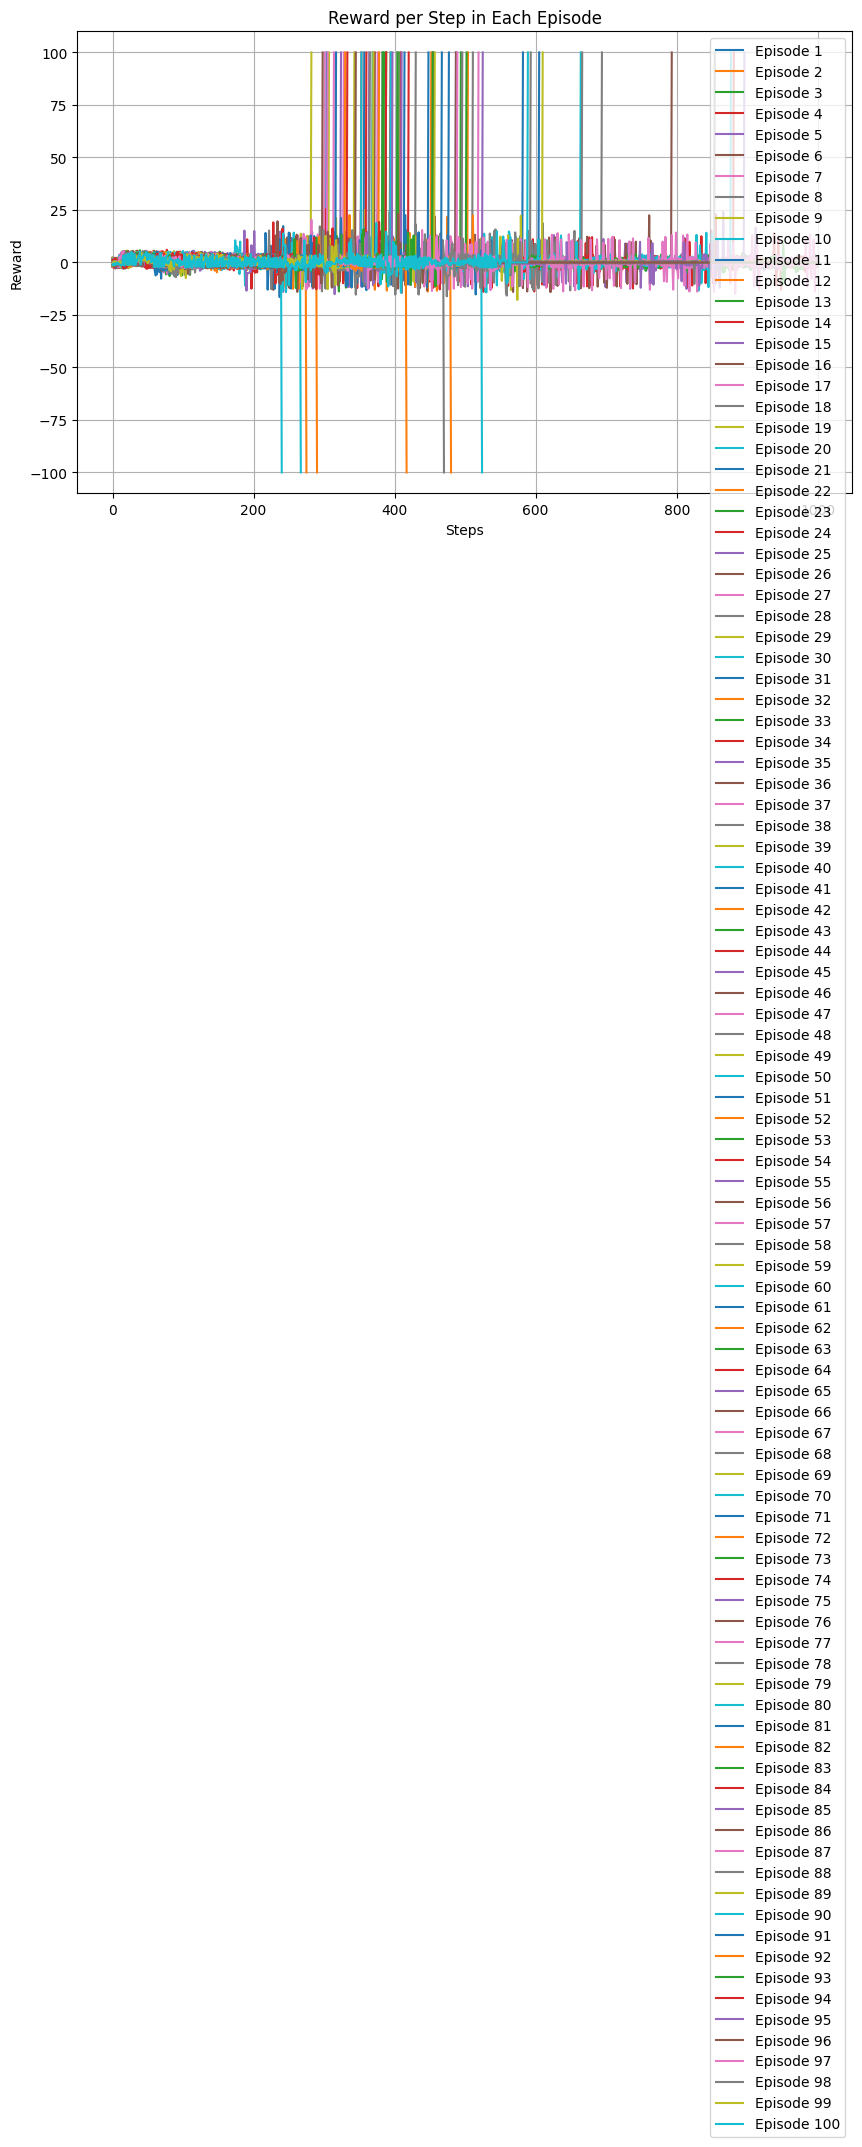

Average episode length: 540.13


In [16]:
# prompt: I want to plot how fast by episode and by step (each action) it takes each model to get to the goal. I also want to know what the average episode length is till the first goal. Please plot this so it can be visually displayed.

import matplotlib.pyplot as plt

# Assuming 'model' is your trained DQN model and 'eval_env' is your evaluation environment
#  and you have already run the training and evaluation cells above

n_eval_episodes = 100
episode_rewards = []
episode_lengths = []
step_rewards = []
all_step_rewards = []

for episode in range(n_eval_episodes):
    obs, info = eval_env.reset()
    done = False
    episode_reward = 0
    episode_length = 0
    steps_rewards = []
    while not done:
        action, _states = model.predict(obs, deterministic=True)
        obs, reward, terminated, truncated, info = eval_env.step(action)
        episode_reward += reward
        episode_length +=1
        steps_rewards.append(reward)
        done = terminated or truncated  # Check for both termination and truncation
    episode_rewards.append(episode_reward)
    episode_lengths.append(episode_length)
    step_rewards.append(steps_rewards)
    all_step_rewards.extend(steps_rewards)

#Plot 1: Episode Rewards
plt.figure(figsize=(10, 6))
plt.plot(range(1, n_eval_episodes + 1), episode_rewards, marker='o', linestyle='-')
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.title('Total Reward per Episode')
plt.grid(True)
plt.show()

#Plot 2: Episode Lengths
plt.figure(figsize=(10, 6))
plt.plot(range(1, n_eval_episodes + 1), episode_lengths, marker='o', linestyle='-')
plt.xlabel('Episode')
plt.ylabel('Episode Length (Steps)')
plt.title('Episode Lengths')
plt.grid(True)
plt.show()

#Plot 3: Step Rewards
plt.figure(figsize=(10,6))
for i, episode_steps in enumerate(step_rewards):
    plt.plot(range(len(episode_steps)), episode_steps, label=f'Episode {i+1}')
plt.xlabel("Steps")
plt.ylabel("Reward")
plt.title('Reward per Step in Each Episode')
plt.legend()
plt.grid(True)
plt.show()

#Calculate and print average episode length
avg_episode_length = sum(episode_lengths)/len(episode_lengths)
print(f"Average episode length: {avg_episode_length}")
